In [ ]:
#references : https://www.youtube.com/watch?v=nHIUYwN-5rM&ab_channel=codebasics

In [1]:
import pandas as pd
import numpy as np
import re
import string

# Read Data

In [2]:
spam_df = pd.read_csv('./spam.csv')
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# Labeling

In [ ]:
#cara ke-1

In [ ]:
label = []

for index, row in spam_df.iterrows():
    if row['Category'] == 'spam' : 
        label.append(1) #label 1 untuk spam
    else : 
        label.append(0) #label 0 untuk bukan spam
        
spam_df['label'] = label

In [ ]:
#cara ke-2

In [5]:
spam_df['label'] = [1 if t =='spam' else 0 for t in spam_df['Category'] ]

In [6]:
spam_df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#cara ke-3

In [ ]:
spam_df['label'] = spam_df['Category'].apply(lambda x : 1 if x == 'spam' else 0)

In [ ]:
spam_df.head()

In [ ]:
#cara ke-4

In [ ]:
spam_df['label'] = pd.get_dummies(spam_df['Category'], drop_first=True)

In [ ]:
spam_df.head()

In [7]:
spam_df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

# visualisasi text

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

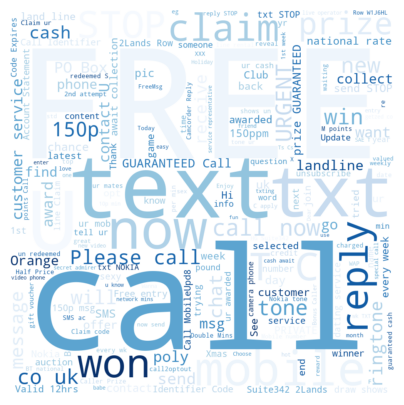

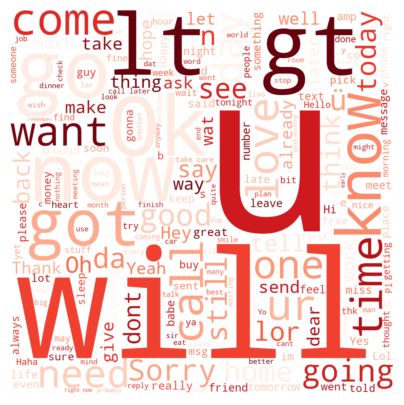

In [9]:
content_1 = spam_df[spam_df['label']==1]
content_1 = ' '.join(word for word in content_1['Message'])
wcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_1)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

content_0 = spam_df[spam_df['label']==0]
content_0 = ' '.join(word for word in content_0['Message'])
wcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_0)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Text Cleansing

In [10]:
def remove_unused(text):
    text = re.sub('[0-9]+', '', text) #untuk menghilangkan angka
    text = re.sub(r'\$\w*', '', text) # 
    text = re.sub(r'@[\w]*', '', text) #untuk menghilangkan @user
    text = re.sub(r'https?://\S+', '', text) #untuk menghilangkan link
    text = re.sub(r'#', '', text) #untuk menghilangkan #
    text = re.sub(r'RT[\s]+', '', text) #untuk menghilangkan RT***
    text = text.replace('\n', ' ') #untuk mengganti \n dengan ' '
    #untuk menghilangkan non-ASCII characters dan unicode
    text = text.encode('ascii', 'ignore').decode('utf-8') 
    text = re.sub(r'[^\x00-\x7f]', r'', text)  
    text = re.sub(r'[^\w]', ' ', text) #untuk menghiilangkan selain alpha numerik
    #untuk menghilangkan double atau lebih spasi
    space = ['    ', '   ', '  ']
    for i in space:
        text = text.replace(i, ' ')
    text = text.lower().strip()
#     text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [11]:
spam_df['cleantext'] = spam_df['Message'].apply(lambda x: remove_unused(x))
email_df = spam_df[['cleantext', 'label']]

In [12]:
email_df

,cleantext,label
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives arou...,0
...,...,...
5567,this is the nd time we have tried contact u u ...,1
5568,will b going to esplanade fr home,0
5569,pity was in mood for that so any other suggest...,0
5570,the guy did some bitching but i acted like i d...,0


In [13]:
#import stemmer
import nltk
from nltk.stem.snowball import SnowballStemmer
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')
#import stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer_id = StemmerFactory().create_stemmer()

In [14]:
#import stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
stopworder = set(stopwords.words('indonesian', 'english'))
stopword = StopWordRemoverFactory().create_stop_word_remover()
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize

In [15]:
def cleansing(data):
    text = stemmer_id.stem(data)
    text = stopword.remove(text)
    text = tokenizer(text)
#     text = [stemmer.stem(t) for t in text] #.split(' ')]#stemmer inggris
    text = [word for word in text if word not in stopworder]
    text = ' '.join(word for word in text)
    return text

In [16]:
email_df['cleantext'] = email_df['cleantext'].apply(cleansing)

0       go until jurong point crazy available only in ...
1                                   ok lar joking wif oni
2       free entry in wkly comp to win fa cup final tk...
3                   dun say so early hor already then say
4       don think he goes to usf he lives around here ...
                              ...                        
5567    this is the nd time we have tried contact have...
5568                      will going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but acted like be in...
5571                            rofl its true to its name
Name: cleantext, Length: 5572, dtype: object

In [17]:
email_df.head()

,cleantext,label
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives arou...,0


In [18]:
#contoh
t = 'cleaning my is i you merging liking handling by washing it, halo menanyakan kabarnya miliknya apakah sendirian berteman'
cleansing(t)

'cleaning my is you merging liking handling by washing it kabar milik teman'

# Feature Enginering Bag Of Word

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(email_df.cleantext, email_df.label, test_size=0.20)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer_bow= CountVectorizer()

In [22]:
X_train_vec = vectorizer_bow.fit_transform(X_train)
X_test_vec= vectorizer_bow.transform(X_test)

In [23]:
print(X_train_vec.shape)
print(X_test_vec.shape)

(4457, 6952)
(1115, 6952)


# Modeling

In [ ]:
#MultiNomialNB untuk 

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()

In [26]:
model_nb.fit(X_train_vec, y_train)

MultinomialNB()

In [27]:
pred = model_nb.predict(X_test_vec)

In [28]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy : {accuracy}')

accuracy : 0.9883408071748879


In [29]:
model_nb.score(X_test_vec, y_test)

0.9883408071748879

# Menggunakan Pipeline

In [30]:
#pipeline
from sklearn.pipeline import Pipeline

pipe_model = Pipeline([
    ('vectorer', CountVectorizer()),
    ('multinonb', MultinomialNB())
])

In [31]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('vectorer', CountVectorizer()),
                ('multinonb', MultinomialNB())])

In [32]:
predict = pipe_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, predict)
print(f'accuracy : {accuracy}')

accuracy : 0.9883408071748879


In [34]:
pipe_model.score(X_test, y_test)

0.9883408071748879

In [35]:
import pickle

In [36]:
pickle.dump(model_nb,open('email_multinonb.pkl', 'wb'))

# Prediksi

In [37]:
label = {1 : 'spam', 0 : 'ham'}
print(label)

{1: 'spam', 0: 'ham'}


In [38]:
text_spam = 'You’ve won a prize! Go to [link] to claim your $500 Amazon gift card'
text_nospam = 'hey jack, how are you long time no see'

# Cleansing

In [39]:
text_clean = remove_unused(text_spam)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

youve won a prize go to link to claim your amazon gift card
youve won prize go to link to claim your amazon gift card


# Feature Enginering

In [40]:
pred_text = vectorizer_bow.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

(1, 6952)
[[0 0 0 ... 0 0 0]]


In [41]:
prediksi = model_nb.predict(pred_text)
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)

merupakan text : spam
